# New Section

In [1]:
!nvidia-smi

Wed Feb 24 10:26:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    33W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import string
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_path = r"/content/drive/MyDrive/Colab Notebooks/Corona_NLP_train.csv"
test_path = r"/content/drive/MyDrive/Colab Notebooks/Corona_NLP_test.csv"

In [5]:
df_train = pd.read_csv(train_path, encoding='latin1')
df_train = df_train.iloc[:,-2:]
df_train.Sentiment = df_train.Sentiment.replace('Extremely Positive', 'Positive')
df_train.Sentiment = df_train.Sentiment.replace('Extremely Negative', 'Negative')


df_test = pd.read_csv(test_path, encoding='latin1')
df_test = df_test.iloc[:,-2:]
df_test.Sentiment = df_test.Sentiment.replace('Extremely Positive', 'Positive')
df_test.Sentiment = df_test.Sentiment.replace('Extremely Negative', 'Negative')

In [6]:
df_train.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [7]:
df_test.Sentiment.value_counts()

Negative    1633
Positive    1546
Neutral      619
Name: Sentiment, dtype: int64

In [8]:
X_train = df_train.OriginalTweet
X_test = df_test.OriginalTweet

y_train = df_train.Sentiment
y_test = df_test.Sentiment

df = df_train.append(df_test, ignore_index=True)

In [9]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


In [10]:
df.Sentiment.value_counts()

Positive    19592
Negative    17031
Neutral      8332
Name: Sentiment, dtype: int64

In [11]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [12]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [14]:
num_classes = 3

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['Neutral','Positive','Negative']

In [ ]:
# review = re.sub(r'http\S+', '', messages['OriginalTweet'][i])
#     review = re.sub('[^a-zA-Z]', ' ', review)
#     review = review.lower()
#     review = review.split()
    
#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

In [22]:
def clean_text(data):
    
    # remove hashtags and @usernames
    data = re.sub(r'http\S+', '', data)
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = data.lower()
    # data = data.split()

    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [23]:
import nltk
nltk.download('punkt')
texts = [' '.join(clean_text(text)) for text in df.OriginalTweet]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
texts_train

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 54647


In [27]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[    0,     0,     0, ..., 13329,     3,     3],
       [    0,     0,     0, ...,    36,   110,   246],
       [    0,     0,     0, ...,   173,     4,   136],
       ...,
       [    0,     0,     0, ...,    82,    70,    43],
       [    0,     0,     0, ...,     8,     4,     8],
       [    0,     0,     0, ...,     2,    13, 52280]], dtype=int32)

In [28]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [29]:
encoding = {'Neutral':0, 'Positive':1, 'Negative':2}

# Integer labels
y_train = [encoding[x] for x in df_train.Sentiment]
y_test = [encoding[x] for x in df_test.Sentiment]

In [30]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding, GRU
from tensorflow.keras.callbacks import EarlyStopping

embedding_vector_features=128
voc_size=1000

# embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=max_seq_len))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(100,return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(50,return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(10)))
model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          6994944   
_________________________________________________________________
dropout_8 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 500, 200)          138000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 200)          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 500, 100)          75600     
_________________________________________________________________
dropout_10 (Dropout)         (None, 500, 100)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 20)               

In [36]:
X_train_pad.shape

(41157, 500)

In [38]:
y_train.shape

(41157, 3)

In [39]:
X_test_pad.shape

(3798, 500)

In [40]:
y_test.shape

(3798, 3)

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

model.fit(X_train_pad, y_train,epochs=50,batch_size=64,validation_data=(X_test_pad, y_test),callbacks=[early_stop])

Epoch 1/50
644/644 [==============================] - 152s 221ms/step - loss: 0.5595 - accuracy: 0.5365 - val_loss: 0.3092 - val_accuracy: 0.8270
Epoch 2/50
644/644 [==============================] - 141s 219ms/step - loss: 0.3015 - accuracy: 0.8581 - val_loss: 0.2610 - val_accuracy: 0.8586
Epoch 3/50
644/644 [==============================] - 140s 218ms/step - loss: 0.2192 - accuracy: 0.9093 - val_loss: 0.2648 - val_accuracy: 0.8631
Epoch 4/50
644/644 [==============================] - 140s 217ms/step - loss: 0.1790 - accuracy: 0.9268 - val_loss: 0.2793 - val_accuracy: 0.8586
Epoch 5/50
644/644 [==============================] - 139s 216ms/step - loss: 0.1399 - accuracy: 0.9458 - val_loss: 0.3151 - val_accuracy: 0.8468
Epoch 6/50
644/644 [==============================] - 140s 217ms/step - loss: 0.1170 - accuracy: 0.9535 - val_loss: 0.3381 - val_accuracy: 0.8431
Epoch 7/50
644/644 [==============================] - 140s 217ms/step - loss: 0.1011 - accuracy: 0.9604 - val_loss: 0.3728 -

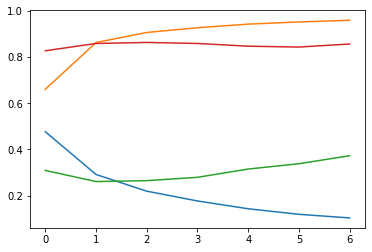

In [46]:
loss = pd.DataFrame(model.history.history)

plt.plot(loss)

In [49]:
model.save('FINAL_BI_GRU_senti_analysis.h5')

In [50]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [52]:
print("Accuracy: {:.2f}%".format(accuracy_score(df_test.Sentiment, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df_test.Sentiment, predictions, average='micro') * 100))

Accuracy: 85.62%

F1 Score: 85.62


In [54]:
print('Message: {}\nPredicted: {}'.format(X_test[1], predictions[1]))

Message: When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY
Predicted: Positive


In [55]:
print('Message: {}\nPredicted: {}'.format(X_test[0], predictions[0]))

Message: TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1
Predicted: Negative


In [59]:
import time

message = ['Corona virus is bad for humans']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['Corona virus is bad for humans']
predicted: Negative (0.07 seconds)


<br>
____________________________________________________________________________________________________________________________